<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/3701-3750.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [213]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [214]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

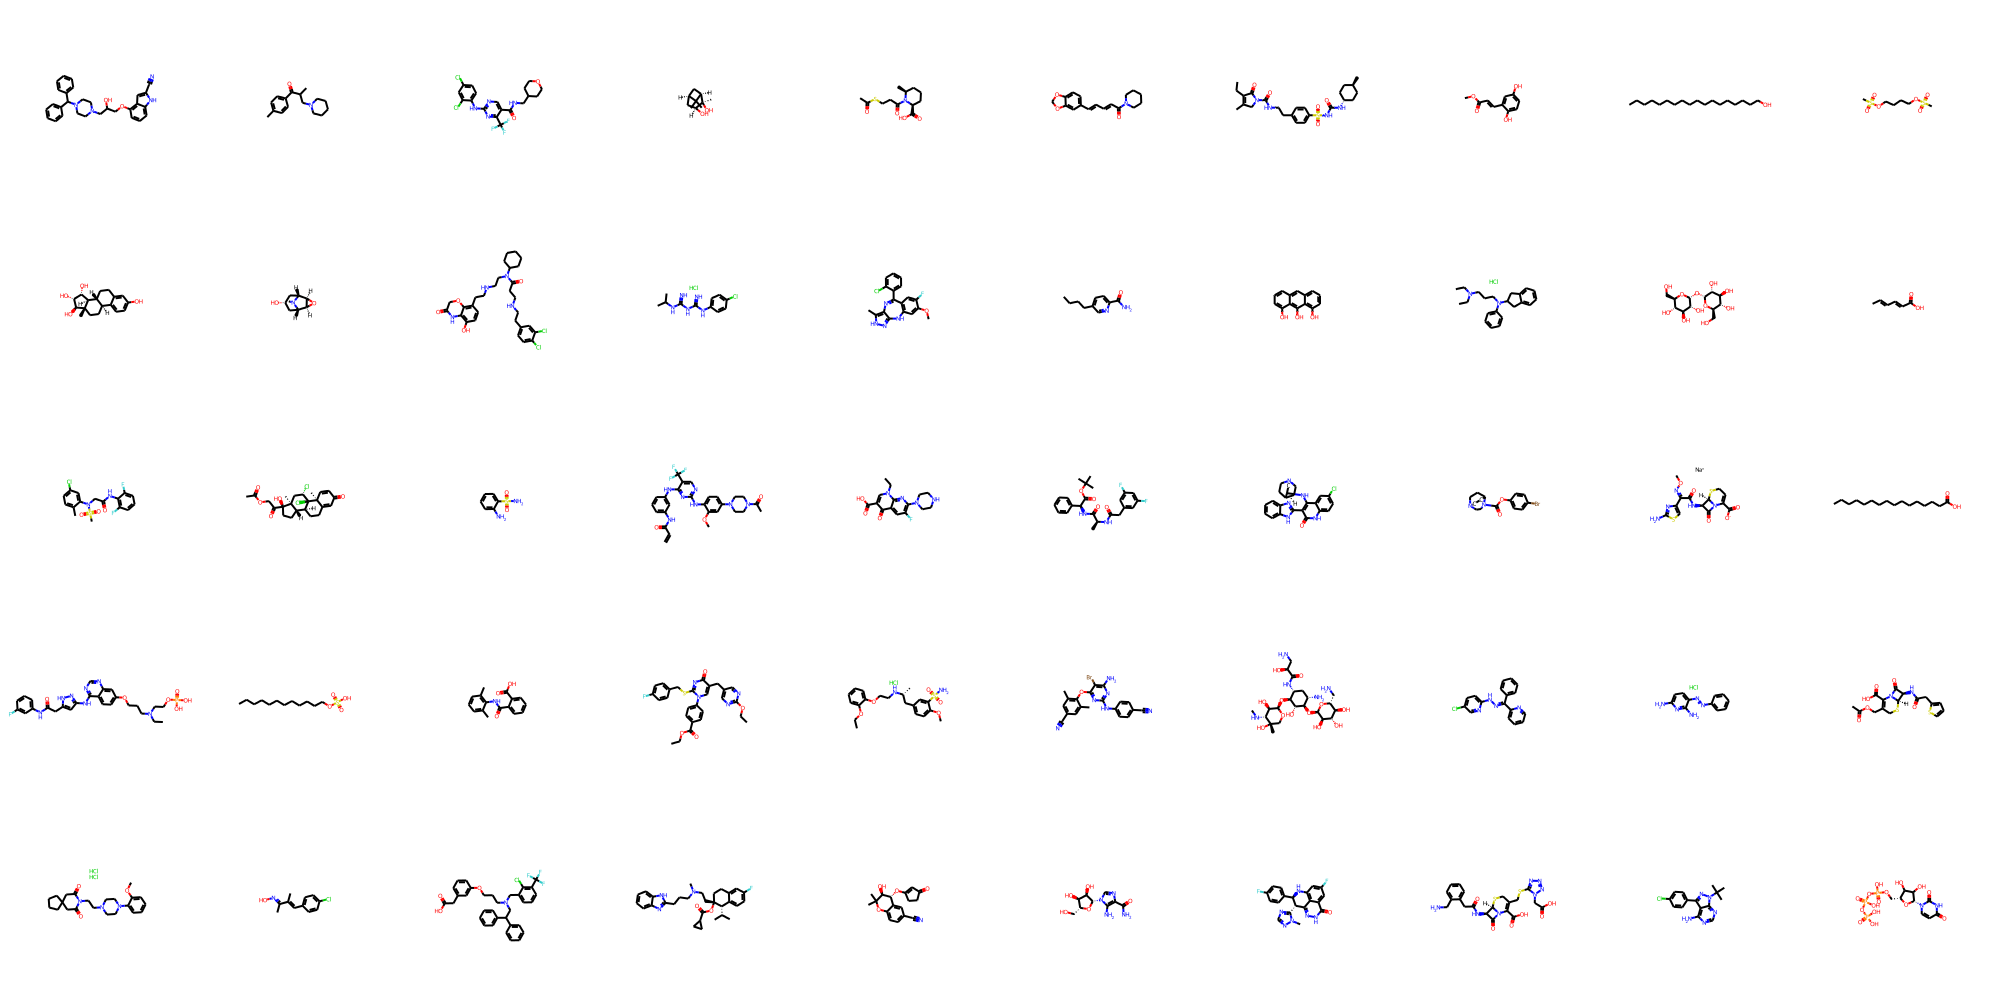

In [215]:
smiles_list = [

'N#Cc1cc2c(OCC(O)CN3CCN(C(c4ccccc4)c4ccccc4)CC3)cccc2[nH]1',
'Cc1ccc(C(=O)C(C)CN2CCCCC2)cc1',
'O=C(NCC1CCOCC1)c1cnc(Nc2ccc(Cl)cc2Cl)nc1C(F)(F)F',
'CC1(C)[C@H]2C[C@H](O)[C@](C)(O)[C@@H]1C2',
'CC(=O)SCCC(=O)N1[C@@H](C)CCC[C@H]1C(=O)O',
'O=C(/C=C/C=C/c1ccc2c(c1)OCO2)N1CCCCC1',
'CCC1=C(C)CN(C(=O)NCCc2ccc(S(=O)(=O)NC(=O)N[C@H]3CC[C@H](C)CC3)cc2)C1=O',
'COC(=O)/C=C/c1cc(O)ccc1O',
'CCCCCCCCCCCCCCCCCCO',
'CS(=O)(=O)OCCCCOS(C)(=O)=O',
'C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1[C@@H](O)[C@@H](O)[C@@H]2O',
'CN1[C@H]2C[C@H](O)C[C@@H]1[C@H]1O[C@@H]21',
'O=C1COc2c(CCNCCN(C(=O)CCNCCc3ccc(Cl)c(Cl)c3)C3CCCCC3)ccc(O)c2N1',
'CC(C)NC(=N)NC(=N)Nc1ccc(Cl)cc1.Cl',
'COc1cc2c(cc1F)C(c1ccccc1Cl)=Nc1c(n[nH]c1C)N2',
'CCCCc1ccc(C(N)=O)nc1',
'Oc1cccc2cc3cccc(O)c3c(O)c12',
'CCN(CC)CCCN(c1ccccc1)C1Cc2ccccc2C1.Cl',
'OC[C@H]1O[C@H](O[C@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]2O)[C@H](O)[C@@H](O)[C@@H]1O',
'CC=CC=CC(=O)O',
'Cc1ccc(Cl)cc1N(CC(=O)Nc1c(F)cccc1F)S(C)(=O)=O',
'CC(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@@]3(Cl)[C@@H](Cl)C[C@@]21C',
'Nc1ccccc1S(N)(=O)=O',
'C=CC(=O)Nc1cccc(Nc2nc(Nc3ccc(N4CCN(C(C)=O)CC4)cc3OC)ncc2C(F)(F)F)c1',
'CCn1cc(C(=O)O)c(=O)c2cc(F)c(N3CCNCC3)nc21',
'C[C@H](NC(=O)Cc1cc(F)cc(F)c1)C(=O)N[C@H](C(=O)OC(C)(C)C)c1ccccc1',
'O=c1[nH]c2ccc(Cl)cc2c(N[C@@H]2CN3CCC2CC3)c1-c1nc2ccccc2[nH]1',
'O=C(Oc1ccc(Br)cc1)N1CCN2CCC1CC2',
'CO/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)[O-])=CCS[C@H]12)c1csc(N)n1.[Na+]',
'CCCCCCCCCCCCCCCC(=O)O',
'CCN(CCCOc1ccc2c(Nc3cc(CC(=O)Nc4cccc(F)c4)[nH]n3)ncnc2c1)CCOP(=O)(O)O',
'CCCCCCCCCCCCOS(=O)(=O)O',
'Cc1cccc(C)c1NC(=O)c1ccccc1C(=O)O',
'CCOC(=O)c1ccc(-n2cc(Cc3cnc(OCC)nc3)c(=O)nc2SCc2ccc(F)cc2)cc1',
'CCOc1ccccc1OCCN[C@H](C)Cc1ccc(OC)c(S(N)(=O)=O)c1.Cl',
'Cc1cc(C#N)cc(C)c1Oc1nc(Nc2ccc(C#N)cc2)nc(N)c1Br',
'CN[C@@H]1[C@@H](O)[C@@H](O[C@@H]2[C@@H](O)[C@H](O[C@H]3O[C@H](CN)[C@@H](O)[C@H](O)[C@H]3O)[C@@H](N)C[C@H]2NC(=O)[C@@H](O)CN)OC[C@]1(C)O',
'Clc1ccc(N/N=C(\c2ccccc2)c2ccccn2)nc1',
'Cl.Nc1ccc(/N=N/c2ccccc2)c(N)n1',
'CC(=O)OCC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)Cc3cccs3)[C@H]2SC1',
'COc1ccccc1N1CCN(CCN2C(=O)CC3(CCCC3)CC2=O)CC1.Cl.Cl',
'CC(=C\c1ccc(Cl)cc1)/C(C)=N/O',
'O=C(O)Cc1cccc(OCCCN(Cc2cccc(C(F)(F)F)c2Cl)CC(c2ccccc2)c2ccccc2)c1',
'CC(C)[C@H]1c2ccc(F)cc2CC[C@@]1(CCN(C)CCCc1nc2ccccc2[nH]1)OC(=O)C1CC1',
'CC1(C)Oc2ccc(C#N)cc2[C@@H](OC2=CC(=O)CC2)[C@@H]1O',
'NC(=O)c1ncn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c1N',
'Cn1ncnc1[C@H]1c2n[nH]c(=O)c3cc(F)cc(c23)N[C@@H]1c1ccc(F)cc1',
'NCc1ccccc1CC(=O)N[C@@H]1C(=O)N2C(C(=O)O)=C(CSc3nnnn3CC(=O)O)CS[C@H]12',
'CC(C)(C)n1nc(-c2ccc(Cl)cc2)c2c(N)ncnc21',
'O=c1ccn([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C(O)C2O)c(=O)[nH]1',



]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



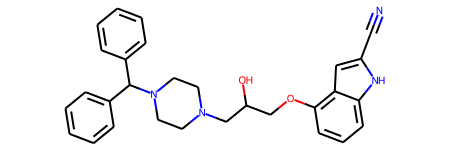

In [216]:
M1 = mol_list [0]
M1

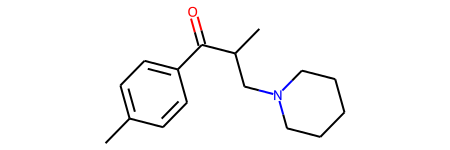

In [217]:
M2 = mol_list [1]
M2

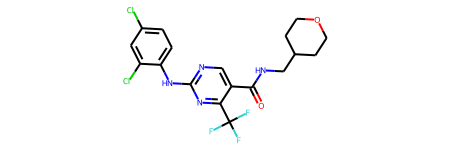

In [218]:
M3 = mol_list [2]
M3

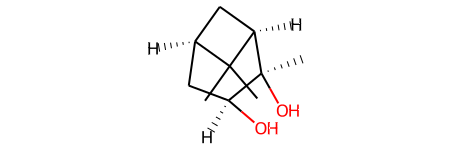

In [219]:
M4 = mol_list [3]
M4

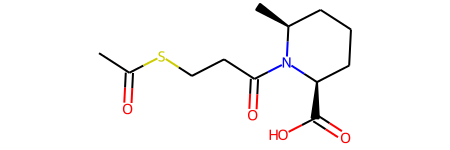

In [220]:
M5 = mol_list [4]
M5

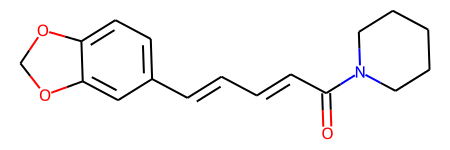

In [221]:
M6 = mol_list [5]
M6

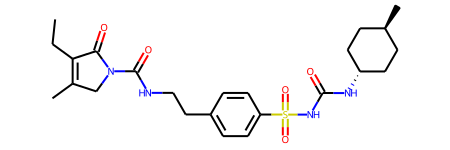

In [222]:
M7 = mol_list [6]
M7

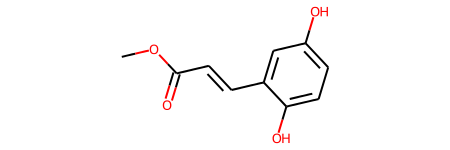

In [223]:
M8 = mol_list [7]
M8

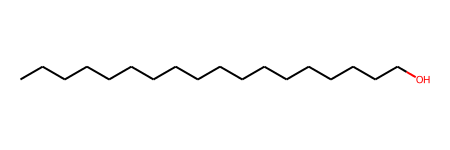

In [224]:
M9 = mol_list [8]
M9

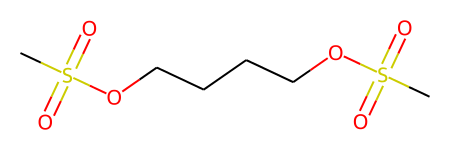

In [225]:
M10 = mol_list [9]
M10

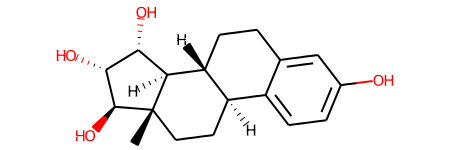

In [226]:
M11 = mol_list [10]
M11

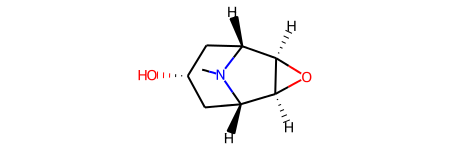

In [227]:
M12 = mol_list [11]
M12

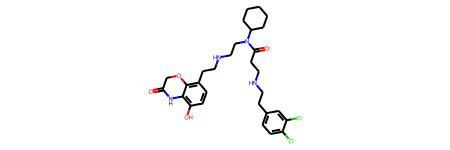

In [228]:
M13 = mol_list [12]
M13

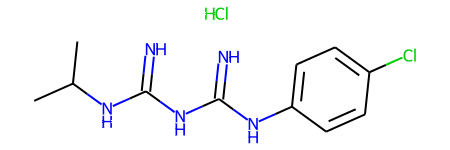

In [229]:
M14 = mol_list [13]
M14

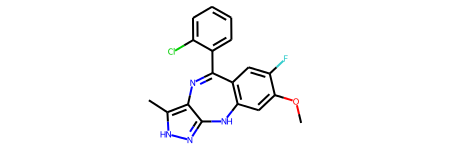

In [230]:
M15 = mol_list [14]
M15

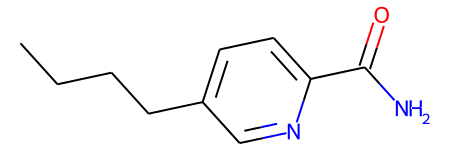

In [231]:
M16 = mol_list [15]
M16

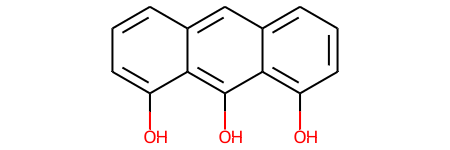

In [232]:
M17 = mol_list [16]
M17

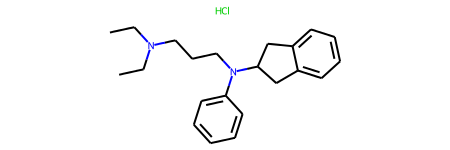

In [233]:
M18 = mol_list [17]
M18

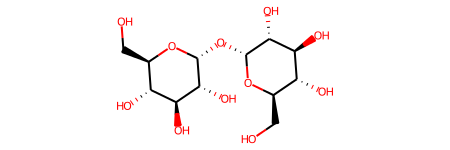

In [234]:
M19 = mol_list [18]
M19

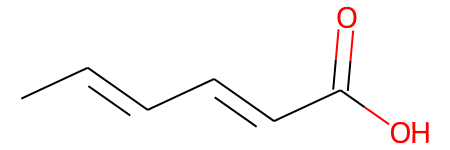

In [235]:
M20 = mol_list [19]
M20

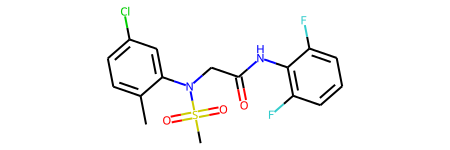

In [236]:
M21 = mol_list [20]
M21

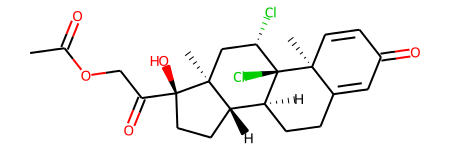

In [237]:
M22 = mol_list [21]
M22

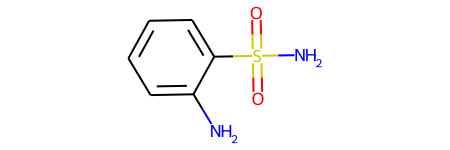

In [238]:
M23 = mol_list [22]
M23

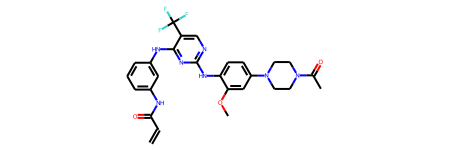

In [239]:
M24 = mol_list [23]
M24

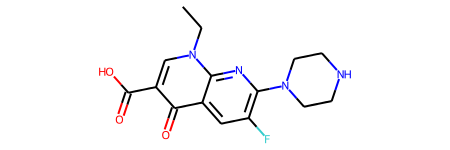

In [240]:
M25 = mol_list [24]
M25

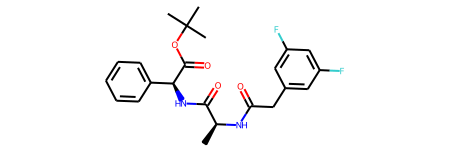

In [241]:
M26 = mol_list [25]
M26

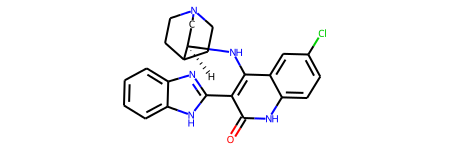

In [242]:
M27 = mol_list [26]
M27

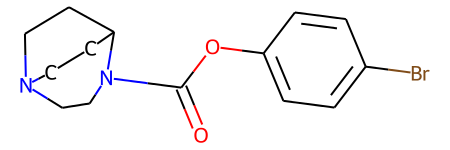

In [243]:
M28 = mol_list [27]
M28

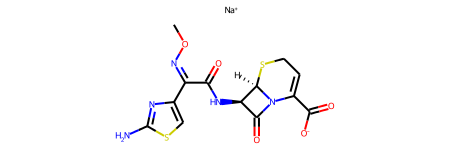

In [244]:
M29 = mol_list [28]
M29

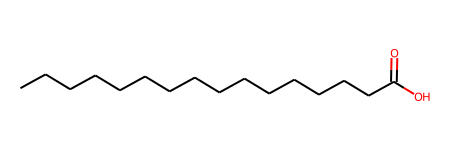

In [245]:
M30 = mol_list [29]
M30

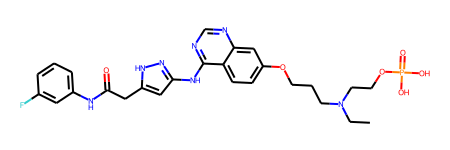

In [246]:
M31 = mol_list [30]
M31

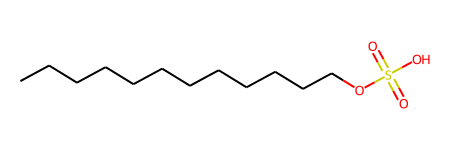

In [247]:
M32 = mol_list [31]
M32

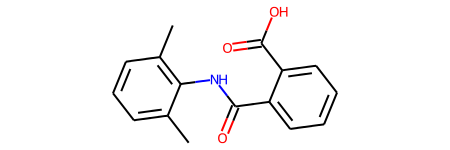

In [248]:
M33 = mol_list [32]
M33

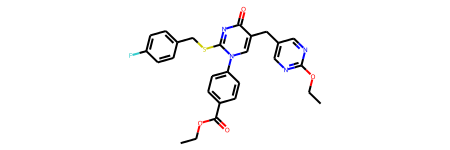

In [249]:
M34 = mol_list [33]
M34

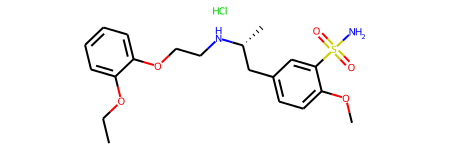

In [250]:
M35 = mol_list [34]
M35

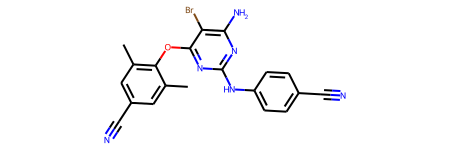

In [251]:
M36 = mol_list [35]
M36

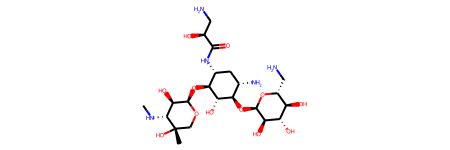

In [252]:
M37= mol_list [36]
M37

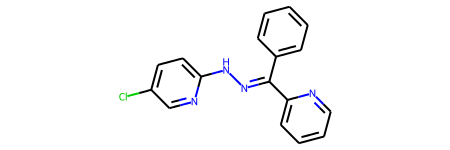

In [253]:
M38= mol_list [37]
M38

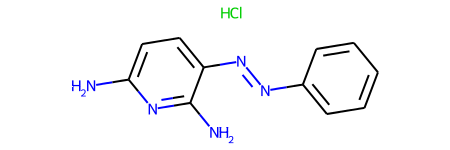

In [254]:
M39= mol_list [38]
M39

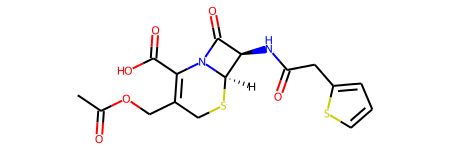

In [255]:
M40= mol_list [39]
M40

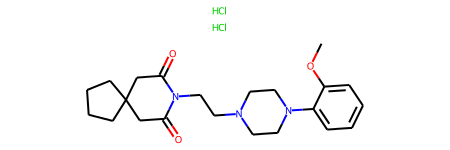

In [256]:
M41= mol_list [40]
M41

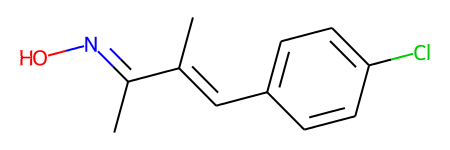

In [257]:
M42= mol_list [41]
M42

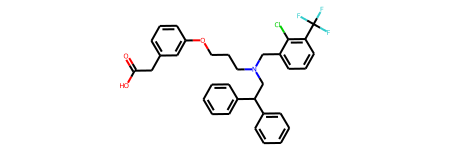

In [258]:
M43= mol_list [42]
M43

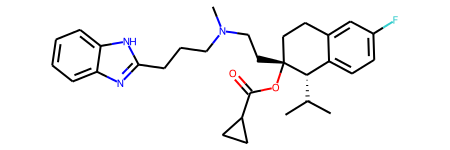

In [259]:
M44= mol_list [43]
M44

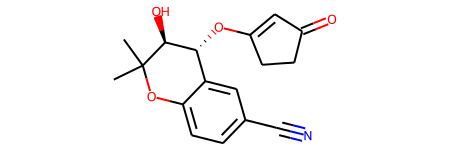

In [260]:
M45= mol_list [44]
M45

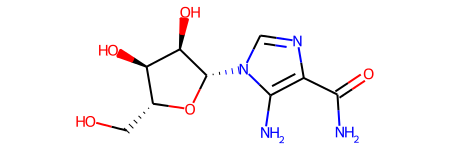

In [261]:
M46= mol_list [45]
M46

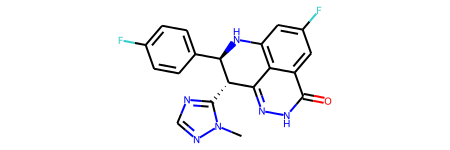

In [262]:
M47= mol_list [46]
M47

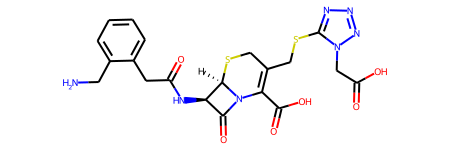

In [263]:
M48= mol_list [47]
M48

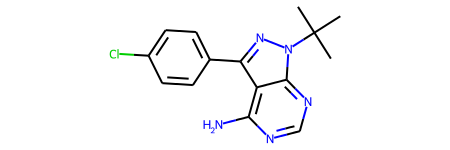

In [264]:
M49= mol_list [48]
M49

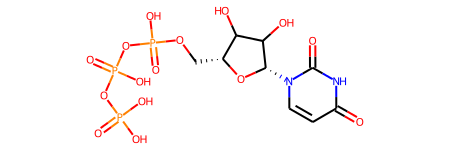

In [265]:
M50= mol_list [49]
M50